In [1]:
from absa.config import DATA_PATHS
from absa.dataset import load_dataset
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [2]:
train_ds_path = DATA_PATHS['asba.semeval16.raw.train']
df = load_dataset(train_ds_path)

In [3]:
df.head()

,id,text,target,category,polarity,from,to
0,1004293:0,Judging from previous posts this used to be a ...,place,RESTAURANT#GENERAL,negative,51,56
1,1004293:1,"We, there were four of us, arrived at noon - t...",staff,SERVICE#GENERAL,negative,75,80
2,1004293:2,"They never brought us complimentary noodles, i...",NULL,SERVICE#GENERAL,negative,0,0
3,1004293:3,The food was lousy - too sweet or too salty an...,food,FOOD#QUALITY,negative,4,8
4,1004293:3,The food was lousy - too sweet or too salty an...,portions,FOOD#STYLE_OPTIONS,negative,52,60


In [4]:
df[['id', 'text']].describe()

,id,text
count,2507,2507
unique,1708,1703
top,1726427:1,We are very particular about sushi and were bo...
freq,8,8


In [7]:
class_labels = list(set(df.category))
pd.DataFrame([{'property': 'num_class_labels', 'value': '%d' % len(class_labels)}, {'property': 'class_labels','value': ', '.join(class_labels)}])

,property,value
0,num_class_labels,12
1,class_labels,"RESTAURANT#MISCELLANEOUS, FOOD#PRICES, FOOD#ST..."


In [8]:
class_label_freq = pd.DataFrame([{'class_label': c, 'frequency': df.category[df.category==c].shape[0]} for c in class_labels])

class_label_freq

,class_label,frequency
0,RESTAURANT#MISCELLANEOUS,98
1,FOOD#PRICES,90
2,FOOD#STYLE_OPTIONS,137
3,RESTAURANT#PRICES,80
4,AMBIENCE#GENERAL,255
5,DRINKS#QUALITY,47
6,FOOD#QUALITY,849
7,SERVICE#GENERAL,449
8,DRINKS#PRICES,20
9,DRINKS#STYLE_OPTIONS,32


In [9]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenize = Tokenizer(nlp.vocab)

In [10]:
df.loc[:, 'tokens'] = df.text.apply(tokenize)

In [11]:
def count_freq(docs):
    vocab = list()
    word_count = {}
    for doc in docs:
        for word in doc:
            word = str(word)
            vocab.append(word)
            if word not in word_count:
                word_count[word] = 0
            word_count[word] += 1
    return sorted(word_count.items(), key=lambda x: x[1], reverse=True)

In [12]:
df.groupby('category')['tokens'].apply(count_freq)

category
AMBIENCE#GENERAL            [(the, 248), (and, 166), (is, 128), (a, 121), ...
DRINKS#PRICES               [(and, 14), (the, 13), (is, 9), (wine, 7), (a,...
DRINKS#QUALITY              [(the, 33), (and, 28), (a, 13), (The, 13), (wi...
DRINKS#STYLE_OPTIONS        [(a, 17), (is, 16), (the, 16), (The, 15), (and...
FOOD#PRICES                 [(and, 58), (the, 51), (a, 43), (is, 35), (foo...
FOOD#QUALITY                [(the, 764), (and, 505), (was, 319), (is, 280)...
FOOD#STYLE_OPTIONS          [(and, 86), (the, 85), (The, 62), (a, 45), (wa...
LOCATION#GENERAL            [(the, 36), (and, 18), (is, 17), (a, 15), (of,...
RESTAURANT#GENERAL          [(I, 146), (the, 144), (and, 112), (to, 100), ...
RESTAURANT#MISCELLANEOUS    [(a, 60), (the, 53), (and, 47), (to, 39), (is,...
RESTAURANT#PRICES           [(the, 64), (and, 41), (a, 26), (is, 26), (to,...
SERVICE#GENERAL             [(the, 371), (and, 302), (was, 154), (to, 153)...
Name: tokens, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = df['text']
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
y = df['category']

In [14]:
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, y)

[Text(276.946720143133, 216.49460869565218, 'X[2316] <= 0.5\ngini = 0.807\nsamples = 2507\nvalue = [255, 20, 47, 32, 90, 849, 137, 28, 422, 98, 80\n449]'),
 Text(231.14984982935414, 214.60382608695653, 'X[2636] <= 0.5\ngini = 0.802\nsamples = 2183\nvalue = [218, 19, 41, 31, 82, 779, 131, 26, 416, 94, 70\n276]'),
 Text(177.82059936633834, 212.71304347826086, 'X[1034] <= 0.5\ngini = 0.795\nsamples = 921\nvalue = [70, 6, 13, 10, 44, 257, 44, 4, 293, 57, 27, 96]'),
 Text(171.67293472234877, 210.8222608695652, 'X[222] <= 0.5\ngini = 0.792\nsamples = 828\nvalue = [65, 6, 11, 9, 36, 201, 38, 4, 289, 55, 26, 88]'),
 Text(165.1671578104759, 208.93147826086957, 'X[2658] <= 0.5\ngini = 0.803\nsamples = 788\nvalue = [64, 6, 11, 9, 36, 201, 38, 4, 253, 54, 25, 87]'),
 Text(158.38318170708135, 207.04069565217392, 'X[685] <= 0.5\ngini = 0.812\nsamples = 688\nvalue = [53, 6, 11, 9, 34, 189, 37, 4, 195, 47, 19, 84]'),
 Text(155.65159562530692, 205.14991304347825, 'X[823] <= 0.5\ngini = 0.815\nsamples =

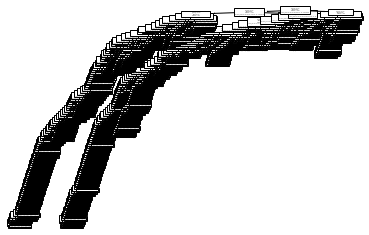

In [16]:
tree.plot_tree(clf)  # doctest: +SKIP